# Import

In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import statsmodels.stats.weightstats as wst
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
#PASSIVE_COLOR = '#505050'
PASSIVE_COLOR = '#4F4F4F'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2
STIM_COLOR = '#E8CA17'
CHOICE_COLOR = '#9DE817'

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #June 22nd, 2023
current_version = 1 #June 28nd, 2023
current_version = 2 #July 27nd, 2023
current_version = 3 #Aug 2nd, 2023
current_version = 4 #Aug 12th, 2023
current_version = 5 #Oct 25th, 2023
current_version = 6 #Nov 6th, 2023
current_version = 7 #April 16th, 2024

stdfont = 14
stdyfrac = 0.06

# Load Data

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

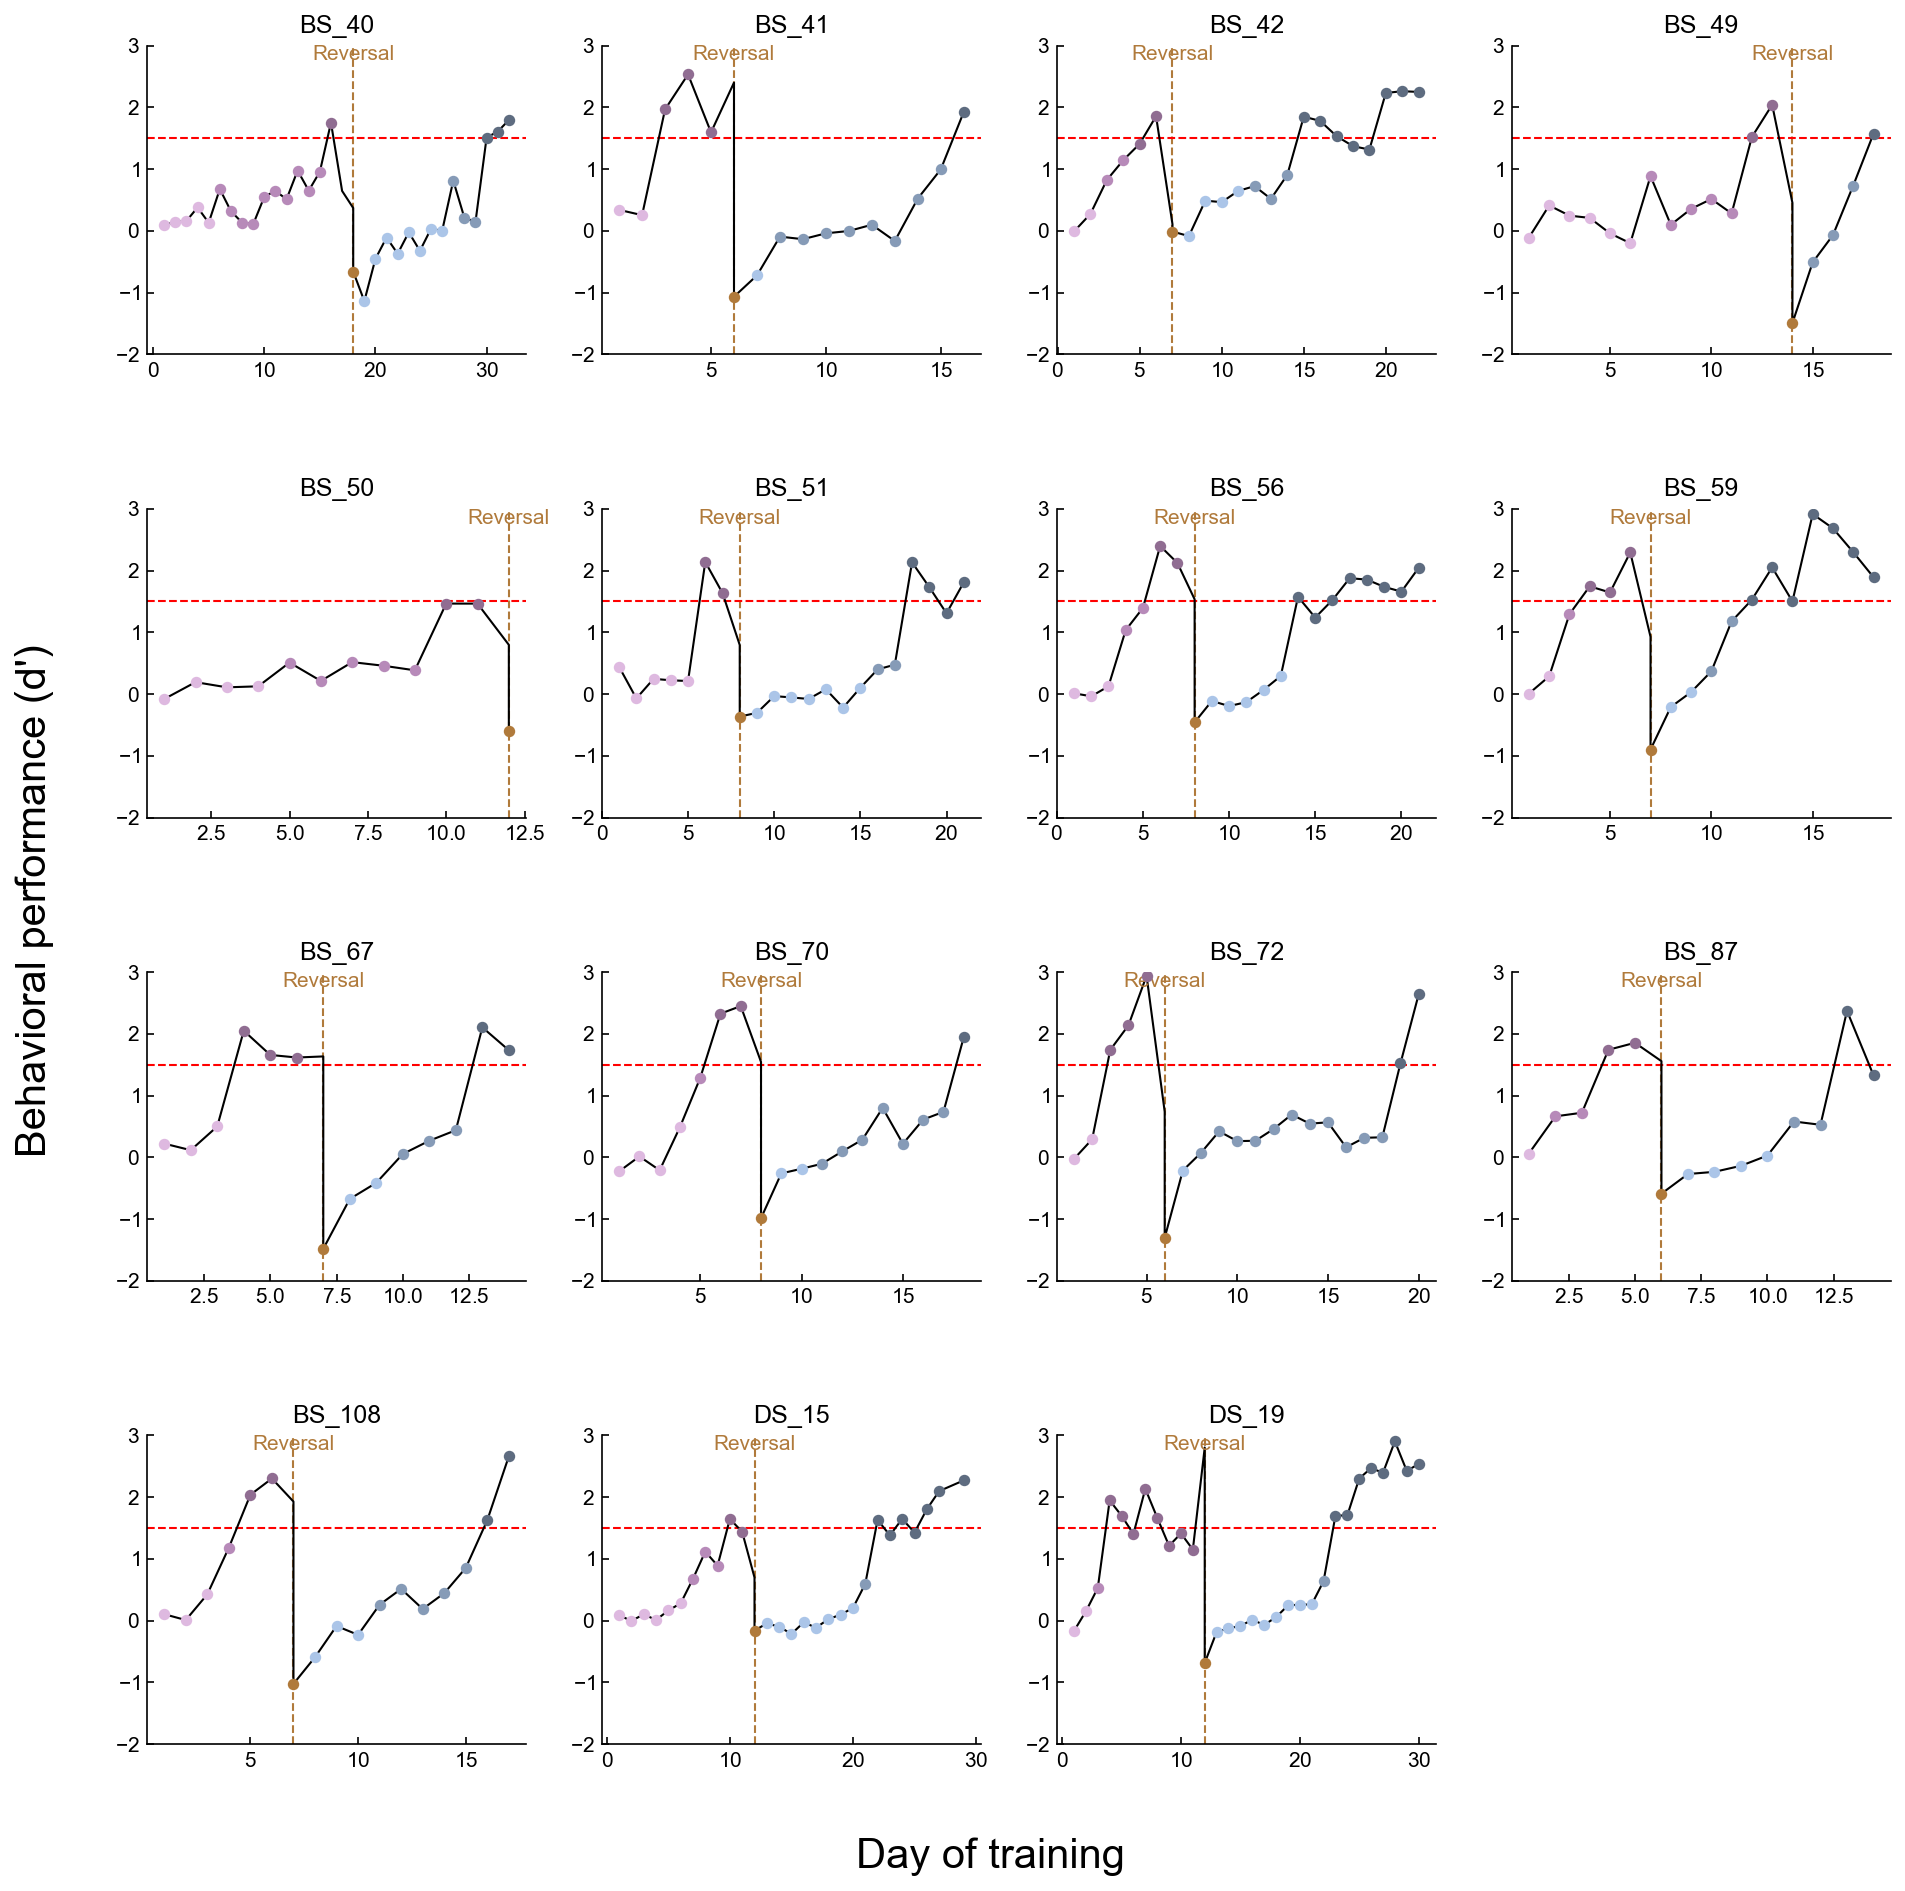

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [5]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:08<00:00, 83.10it/s] 


In [6]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1829/1829 [00:29<00:00, 61.28it/s] 

errors for: []


# Load Decoding Data

In [7]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [8]:
stim_acc = []
choice_acc = []
stim_acc_c = []
choice_acc_c = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
pval_choice_s = []
pval_stim_c = []
pval_choice_c = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    
    pvalue_stim_c = 0.01#getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    pvalue_choice_c = 0.01#getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    
    stim_acc.append(stim_accuracy)
    choice_acc.append(choice_accuracy)
    
    pval_stim_s.append(pvalue_stim_s)
    pval_choice_s.append(pvalue_choice_s)
    
    pval_stim_c.append(pvalue_stim_c)
    pval_choice_c.append(pvalue_choice_c)
    
stim_acc = np.array(stim_acc)
choice_acc = np.array(choice_acc)
pval_stim_s = np.array(pval_stim_s)
pval_choice_s = np.array(pval_choice_s)
pval_stim_c = np.array(pval_stim_c)
pval_choice_c = np.array(pval_choice_c)

1829it [00:08, 217.24it/s]


In [9]:
def get_TE_mask(acc,pval_s):#,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    #is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_valid_pval = np.less(pval_s,0.05)
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_s,task_encoder_threshold_s = get_TE_mask(stim_acc,pval_stim_s)#,pval_stim_c)
is_TE_c,task_encoder_threshold_c = get_TE_mask(choice_acc,pval_choice_s)#,pval_choice_c)

Task encoder threshold: 0.55951845
Task encoder threshold: 0.5841134751773049


In [10]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

# Ramping_preearly = []
# Ramping_prelate = []
# Ramping_preexpert = []
# Ramping_postearly = []
# Ramping_postlate = []
# Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

#cellstouseFR = 'all cells'
cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(stim_acc[idx]) or pval_stim_s[idx] > 0.05 or stim_acc[idx] < task_encoder_threshold_s:
            continue
        if np.isnan(stim_acc[idx]) or np.isnan(pval_stim_s[idx]):
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

# Ramping_preearly = np.array(Ramping_preearly)
# Ramping_prelate = np.array(Ramping_prelate)
# Ramping_preexpert = np.array(Ramping_preexpert)
# Ramping_postearly = np.array(Ramping_postearly)
# Ramping_postlate = np.array(Ramping_postlate)
# Ramping_postexpert = np.array(Ramping_postexpert)

1829it [00:30, 59.65it/s] 


In [12]:
print(len(FRmod_preearly))
print(len(FRmod_prelate))
print(len(FRmod_preexpert))
print(len(FRmod_postearly))
print(len(FRmod_postlate))
print(len(FRmod_postexpert))

37
51
50
93
137
80


### V2

baseline = 10.69767441860465


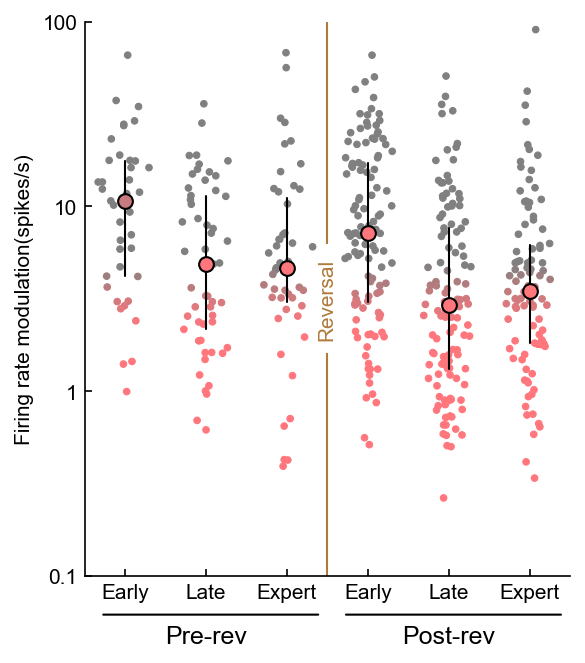

In [12]:
#Firing rate modulation graphs
size=10

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)

mn = 3.5
spread = 2.5
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

    
#Connected lines
# medians = [np.nanmedian(d) for d in data]
# ax.plot([0,1,2],medians[0:3],linestyle='--',color=GOOD_GREY,lw=1)
# ax.plot([3,4,5],medians[3:6],linestyle='--',color=GOOD_GREY,lw=1)

ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation(spikes/s)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#bax.axs[0].text(reversal,ax.get_ylim()[1]+0.2,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='top')
size = 5
rev = 2.5
center = 10**(0.5)#center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
ax.plot([rev,rev],[ax.get_ylim()[0],center/2],color=SWITCH_COLOR,lw=1,linestyle='-')
ax.plot([rev,rev],[center*2,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 0.054188468134356925, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
ax.text(xtick_pos_post, 0.054188468134356925, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

### V3

baseline = 10.69767441860465


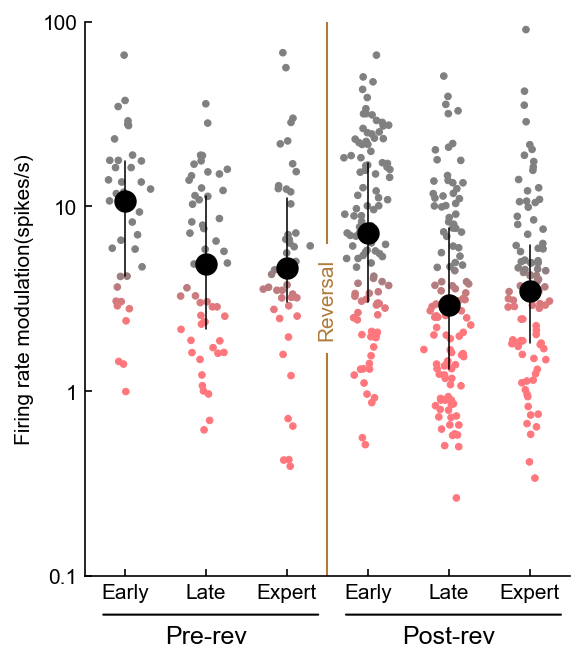

In [11]:
#Firing rate modulation graphs
size=10

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)

mn = 3.5
spread = 2.5
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= NCR_CR_cmap((percentCR-40)/20)
    eye_color = 'k'
    border_color = 'k'#eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=100
    summary_width=0.75
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

    
#Connected lines
# medians = [np.nanmedian(d) for d in data]
# ax.plot([0,1,2],medians[0:3],linestyle='--',color=GOOD_GREY,lw=1)
# ax.plot([3,4,5],medians[3:6],linestyle='--',color=GOOD_GREY,lw=1)

ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation(spikes/s)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#bax.axs[0].text(reversal,ax.get_ylim()[1]+0.2,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='top')
size = 5
rev = 2.5
center = 10**(0.5)#center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
ax.plot([rev,rev],[ax.get_ylim()[0],center/2],color=SWITCH_COLOR,lw=1,linestyle='-')
ax.plot([rev,rev],[center*2,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 0.054188468134356925, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
ax.text(xtick_pos_post, 0.054188468134356925, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

### V4

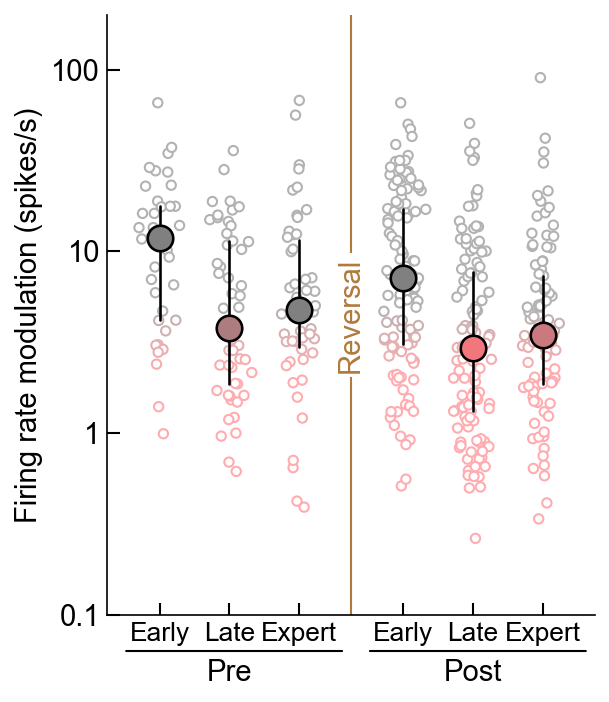

In [244]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

###

X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0.1,200])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
Y = 10**np.mean(np.log10(ax.get_ylim()))
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

### V7

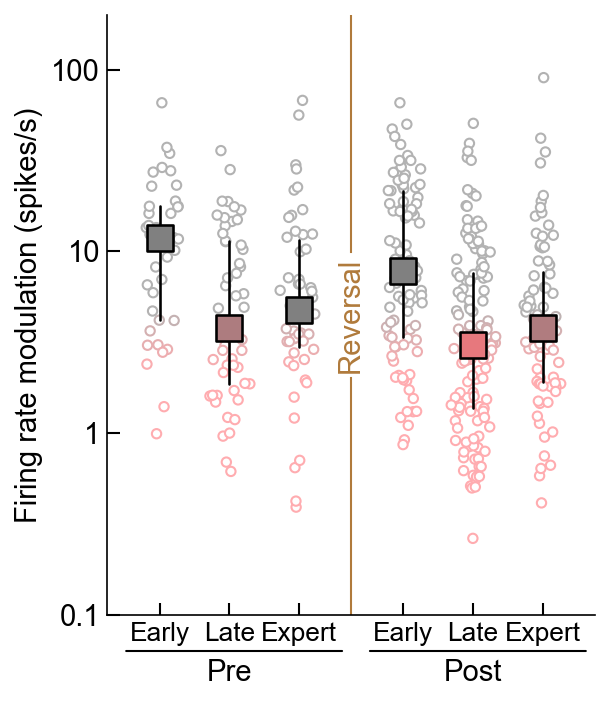

In [11]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

###

X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10,marker='o')
ax.set_yscale('log',subs=[])

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0.1,200])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
Y = 10**np.mean(np.log10(ax.get_ylim()))
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [12]:
[print(len(l)) for l in [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]]

37
51
50
93
137
80


[None, None, None, None, None, None]

In [13]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(FRmod_preearly)
data_dec.prelate = np.abs(FRmod_prelate)
data_dec.preexpert = np.abs(FRmod_preexpert)
data_dec.postearly = np.abs(FRmod_postearly)
data_dec.postlate = np.abs(FRmod_postlate)
data_dec.postexpert = np.abs(FRmod_postexpert)
ilep.mannwhitneycompareall(data_dec)
pass

pre-early   n = 37
pre-late    n = 51
pre-expert  n = 50
post-early  n = 93
post-late   n = 137
post-expert n = 80
pre-early  to pre-late   : 0.002341127682868758
pre-late   to pre-expert : 0.43273539428033503
pre-early  to pre-expert : 0.012434874473713659
post-early to post-late  : 1.7257548197050046e-07
post-late  to post-expert: 0.12362425411118691
post-early to post-expert: 0.00024012746407190067


In [14]:
37+51+50+93+137+80

448

In [12]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(FRmod_preearly)
data_dec.prelate = np.abs(FRmod_prelate)
data_dec.preexpert = np.abs(FRmod_preexpert)
data_dec.postearly = np.abs(FRmod_postearly)
data_dec.postlate = np.abs(FRmod_postlate)
data_dec.postexpert = np.abs(FRmod_postexpert)
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source            SS     DF           MS          F         p-unc  \
0            phase    396.119827    3.0   132.039942   1.027283  3.800190e-01   
1          context   5719.816721    1.0  5719.816721  44.500718  6.027076e-11   
2  phase * context    105.081340    3.0    35.027113   0.272514  8.452354e-01   
3         Residual  73263.886045  570.0   128.533133        NaN           NaN   

        np2  
0  0.005378  
1  0.072418  
2  0.001432  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  8.004249e-05  1.600850e-04  0.462964
8     post-late  baseline  experimental  2.876258e-08  1.150503e-07  0.703907
9    pre-expert  baseline  experimental  8.289916e-03  8.289916e-03  0.373682
10     pre-late  baseline  experimental  1.170564e-03  1.560752e-03  0.669146
key preearly has 37 non-nan elements
key prelate has 51 non-nan elements
key preexpert has 50 non-nan elements
key postearly has 93 n

In [13]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(FRmod_preearly)
data_dec.prelate = np.abs(FRmod_prelate)
data_dec.preexpert = np.abs(FRmod_preexpert)
data_dec.postearly = np.abs(FRmod_postearly)
data_dec.postlate = np.abs(FRmod_postlate)
data_dec.postexpert = np.abs(FRmod_postexpert)
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source            SS     DF           MS          F     p-unc  \
0            phase   1538.111541    3.0   512.703847   5.057800  0.001812   
1          context   1179.255813    1.0  1179.255813  11.633304  0.000689   
2  phase * context   2903.546833    3.0   967.848944   9.547785  0.000004   
3         Residual  63659.700563  628.0   101.368950        NaN       NaN   

        np2  
0  0.023591  
1  0.018187  
2  0.043621  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  1.030202e-01  1.373603e-01 -0.146112
8     post-late  baseline  experimental  2.876258e-08  1.150503e-07  0.703907
9    pre-expert  baseline  experimental  4.327354e-01  4.327354e-01 -0.187266
10     pre-late  baseline  experimental  1.170564e-03  2.341128e-03  0.669146
key preearly has 37 non-nan elements
key prelate has 51 non-nan elements
key preexpert has 50 non-nan elements
key postearly has 93 non-nan elements
key 

In [271]:
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
[print(len(d)) for d in data]

37
51
50
114
116
93


[None, None, None, None, None, None]

In [265]:
37+51+50+114+116+93

461

# Passive

In [14]:
animals_in_cache = []

EnumACSession = []
EnumACClust = []

for session in tqdm(os.listdir(act_directory)):
    
    if session in ['TH_203_1_passive_AC.pickle','TH_203_4_passive_AC.pickle','TH_203_7_passive_AC.pickle','LA_204_2_passive_AC.pickle','LA_204_3_passive_AC.pickle','LA_204_4_passive_AC.pickle']:#Outlier sessions
            continue
            
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234','AE_294']:
        continue
#     if sessionfile.meta.animal not in ['AE_294']:
#         continue
    
    animals_in_cache.append(sessionfile.meta.animal)
    
    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumACSession.append(session)
            EnumACClust.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 740/740 [00:09<00:00, 81.99it/s] 


In [15]:
passive_stim_acc = []
passive_choice_acc = []
passive_stim_acc_c = []
passive_choice_acc_c = []
passive_stim_acc_s = []
passive_choice_acc_s = []
passive_pval_stim_s = []
passive_pval_choice_s = []
passive_pval_stim_c = []
passive_pval_choice_c = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    passive_stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    passive_choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    passive_pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    passive_pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    
    passive_pvalue_stim_c = 0.01#getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    passive_pvalue_choice_c = 0.01#getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    
    passive_stim_acc.append(passive_stim_accuracy)
    passive_choice_acc.append(passive_choice_accuracy)
    
    passive_pval_stim_s.append(passive_pvalue_stim_s)
    passive_pval_choice_s.append(passive_pvalue_choice_s)
    
    passive_pval_stim_c.append(passive_pvalue_stim_c)
    passive_pval_choice_c.append(passive_pvalue_choice_c)
    
passive_stim_acc = np.array(passive_stim_acc)
passive_choice_acc = np.array(passive_choice_acc)
passive_pval_stim_s = np.array(passive_pval_stim_s)
passive_pval_choice_s = np.array(passive_pval_choice_s)
passive_pval_stim_c = np.array(passive_pval_stim_c)
passive_pval_choice_c = np.array(passive_pval_choice_c)

is_TE_p,task_encoder_threshold_p = get_TE_mask(passive_stim_acc,passive_pval_stim_s)#,pval_stim_c)

1540it [00:07, 216.79it/s]

Task encoder threshold: 0.5634469617203128


In [16]:
#Define 6 learning phases(days)
pre_early = 4
pre_late = 6
pre_expert = 8
post_early = 12
post_late = 15
post_expert = 16

#
FRmod_passive_preearly = []
FRmod_passive_prelate = []
FRmod_passive_preexpert = []
FRmod_passive_postearly = []
FRmod_passive_postlate = []
FRmod_passive_postexpert = []

#
preexpert_session_num = []
postlate_session_num = []
postexpert_session_num = []


In [17]:
preearly_animal = []
prelate_animal = []
preexpert_animal = []
postearly_animal = []
postlate_animal = []
postexpert_animal = []

pre_early_session = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
#     if session == 'TH_234_3_passive_AC.pickle' and clust in [109,40]:
#         continue
    
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    acc = passive_stim_acc[idx]
    pval = passive_pval_stim_s[idx]
    if acc < task_encoder_threshold_p or pval > 0.05:
        continue
    if np.isnan(acc) or np.isnan(pval):
        continue
        
    
    if ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation > 70:
        print(f"{session} clust {clust} has passive FRmod {ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation}")
    
    #1,2,3,4
    if ACsessionfile.meta.day_of_training <= pre_early:
        FRmod_passive_preearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preearly_animal.append(ACsessionfile.meta.animal)
        pre_early_session.append(session)
#         print(ACsessionfile.meta.files)
#         print(ACsessionfile.meta.directory)
#         print()
        if ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation < 1:
            print(f"{session} clust {clust} is an NCR")
        
    #5,6
    if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
        FRmod_passive_prelate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        prelate_animal.append(ACsessionfile.meta.animal)
    
    #7,8
    if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
        FRmod_passive_preexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preexpert_session_num.append(ACsessionfile.meta.files)
        preexpert_animal.append(ACsessionfile.meta.animal)
        
    #9,10,11,12
    if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
        FRmod_passive_postearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postearly_animal.append(ACsessionfile.meta.animal)

    #13,14,15
    if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
        FRmod_passive_postlate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postlate_session_num.append(ACsessionfile.meta.files)
        postlate_animal.append(ACsessionfile.meta.animal)
    
    #16,17,18,19,20,21
    if ACsessionfile.meta.day_of_training >= post_expert:
        FRmod_passive_postexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postexpert_session_num.append(ACsessionfile.meta.files)
        postexpert_animal.append(ACsessionfile.meta.animal)
    

907it [00:10, 104.59it/s]

TH_201_3_passive_AC.pickle clust 76 is an NCR


975it [00:11, 141.23it/s]

TH_201_4_passive_AC.pickle clust 79 is an NCR


1062it [00:11, 139.22it/s]

TH_230_1_passive_AC.pickle clust 38 has passive FRmod 107.61904761904762


1149it [00:13, 87.04it/s] 

TH_230_2_passive_AC.pickle clust 80 has passive FRmod 108.4757118927973


1386it [00:14, 243.94it/s]

TH_234_1_passive_AC.pickle clust 5 has passive FRmod 132.9559748427673


1492it [00:15, 115.84it/s]

TH_234_3_passive_AC.pickle clust 40 has passive FRmod 97.52093802345057
TH_234_3_passive_AC.pickle clust 109 has passive FRmod 144.7906197654942


1540it [00:15, 97.44it/s] 


In [18]:
FRmod_passive_preearly = np.array(FRmod_passive_preearly)
FRmod_passive_prelate = np.array(FRmod_passive_prelate)
FRmod_passive_preexpert = np.array(FRmod_passive_preexpert)
FRmod_passive_postearly = np.array(FRmod_passive_postearly)
FRmod_passive_postlate = np.array(FRmod_passive_postlate)
FRmod_passive_postexpert = np.array(FRmod_passive_postexpert)

In [19]:
FRmod_passive_prelate

array([  9.34673367,  23.17460317,  15.01872659,   6.95142379,
         9.51423786,  32.65359477,  34.50586265,  12.02680067,
        13.24958124,   2.79012346,  29.34673367,  17.33668342,
         0.75376884,  12.26130653,  19.13043478,  25.96314908,
        31.49078727,  20.8040201 ,   3.74269006,  11.95035461,
        30.62039958,   5.86264657,   5.56832695,  11.416122  ,
        27.52093802,  36.04690117,   7.2361809 ,  36.93262411,
         9.39698492,  14.43886097,   7.95644891,   3.99201597,
         1.45620023,  19.53098827, 132.95597484,   2.13836478,
         7.79874214,  69.05660377,   4.08805031,  26.35220126,
        19.81132075,  41.63522013,  12.67217631,  14.26523297,
        63.78787879,  28.09045226,   5.57823129,  13.88609715,
         2.42881072,   3.58458961,  23.29140461,  27.08542714,
         6.1641541 ,  20.08375209,  20.93802345,   0.64197531,
        27.12280702,  31.08481262,  22.98157454,  34.0201005 ])

In [20]:
np.mean([  9.34673367,  23.17460317,   6.95142379,   9.51423786,
        32.65359477,  34.50586265,  12.02680067,  29.34673367,
        17.33668342,   0.75376884,  12.26130653,  19.13043478,
        25.96314908,  31.49078727,  20.8040201 ,   3.74269006,
        11.95035461,  30.62039958,   5.86264657,   5.56832695,
        11.416122  ,  27.52093802,  36.04690117,   7.2361809 ,
        36.93262411,   9.39698492,  14.43886097,   7.95644891,
         3.99201597,   1.45620023,  19.53098827,
         2.13836478,  69.05660377,   4.08805031,  26.35220126,
        19.81132075,  41.63522013,  12.67217631,  14.26523297,
        63.78787879,  28.09045226,   5.57823129,  13.88609715,
         2.42881072,   3.58458961,  23.29140461,  27.08542714,
         6.1641541 ,  20.08375209,  20.93802345,   0.64197531,
        27.12280702,  31.08481262,  22.98157454,  34.0201005 ])

18.903965181636362

In [21]:
FRmod_passive_preexpert

array([  6.01340034,  19.04522613,  19.66499162,   6.21440536,
         2.84757119,  18.50921273,  27.89386401,  16.09195402,
        53.11557789,  11.31652661,   5.32663317,  42.39530988,
         0.88777219,   5.60706402,  10.60301508,   7.76632302,
         0.98924731,  10.19047619,   8.96207585,  28.30188679,
        10.73701843,   9.45668135,  11.39028476,   8.57621441,
        14.0201005 ,   1.85929648,   6.99319728,   8.14070352,
        97.52093802,  16.66666667,   7.93969849, 144.79061977,
         5.03401361,   6.2479062 ,  15.79564489,   3.57723577,
         3.71859296,  25.64489112,  13.06532663])

In [22]:
np.mean(FRmod_passive_preexpert)

18.279937545251325

In [23]:
print('loaded')

loaded


In [26]:
[len(l) for l in [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]]

[45, 60, 39, 57, 48, 115]

In [27]:
[np.sum(np.isfinite(l)) for l in [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]]

[45, 60, 39, 57, 48, 115]

In [21]:
41+56+13+19+43+108

280

In [22]:
FRmod_preearly

array([23.16169828,  0.9936766 ,  4.17254902,  4.18823529, 17.73148148,
       11.92156863, 10.14901961, 27.8       , 18.93333333, 13.53333333,
       13.53333333,  1.4       , 29.        ,  5.93333333, 17.6       ,
       22.86666667, 34.66666667,  3.06666667, 16.2       , 16.2       ,
        2.4       , 12.4       ,  8.21705426, 13.90180879,  4.70284238,
       27.33850129,  3.04909561,  2.89405685,  2.79069767, 17.73333333,
       65.79047619, 11.71428571,  3.65714286,  6.5530303 ,  9.31428571,
       37.39047619,  7.01325178])

In [23]:
FRmod_postearly

array([ 3.4469697 ,  3.83333333,  3.26007326, 15.82573455,  9.59386973,
        1.31343284,  0.92013889, 16.72727273,  6.09961686,  1.22093023,
       27.48508099, 21.60569106,  1.55322862, 27.22513089,  5.54347826,
        2.4940048 ,  5.22222222, 26.4       ,  3.727422  , 17.21333333,
       50.14666667,  2.08      , 65.78666667, 16.6       ,  8.89333333,
        4.18666667,  6.69333333, 19.84      , 47.17333333, 22.45333333,
        1.32      ,  2.03333333,  1.94552529,  2.10344828,  5.73333333,
       14.34878587,  0.86597938,  3.32745444, 42.9478458 , 38.78023134,
        8.87486856,  2.66088214, 23.38666667,  5.65925926,  8.27187274,
        1.96881092,  1.73292559,  2.81345566,  2.01960784,  1.10544218,
        4.07511737,  7.56218905, 10.06802721, 31.23893805, 18.32310838,
       29.14965986, 25.03144654,  4.68553459,  5.4245283 ,  2.98742138,
       33.73884834, 23.09748428,  3.06603774, 22.12314225, 23.23899371,
       21.63934426,  5.78616352, 31.69811321, 18.30188679,  7.73

In [24]:
FRmod_postlate

array([ 6.8956743 , 14.96183206,  3.14249364, 12.60814249,  5.34351145,
        4.1475827 ,  1.43765903,  2.43002545,  0.51282051,  0.96296296,
        7.13740458,  6.22137405,  9.70737913,  3.38422392,  7.49235474,
        2.58706468,  2.9226361 , 12.11409396,  0.55913978,  7.48322148,
        1.41001855,  2.01149425,  1.33089133,  1.32183908,  1.67816092,
        3.90804598,  0.62262718,  0.58655222,  3.1381733 ,  1.61616162,
       11.08614232, 10.0877193 ,  0.72      ,  1.56773212,  1.67202572,
        7.25333333,  4.71237195,  2.94573643, 20.89049338,  1.45555556,
        3.57777778, 13.41111111,  6.87777778,  0.2640264 ,  3.07692308,
        3.48888889,  5.96666667,  0.9       ,  0.89371981,  1.98356808,
        0.5       ,  0.73333333,  1.4       ,  0.83333333,  2.20987654,
        3.4       ,  0.84444444,  1.2345679 ,  3.90804598, 32.87449393,
        0.78888889,  0.72463768,  1.92090395,  4.95726496, 17.85888078,
       14.68409586,  8.        ,  2.55208333,  1.38888889,  0.85

In [25]:
FRmod_postexpert

array([ 4.25339367,  4.64555053,  2.91417166, 15.6561086 , 41.99513382,
        5.11494253,  3.16301703,  4.48087432,  4.94505495,  0.95238095,
        4.21052632,  0.58333333,  1.13333333,  0.66666667,  0.75      ,
        4.38333333,  1.87416332,  5.07078507,  7.34848485,  0.64030132,
        5.6873823 , 12.59770115,  5.01149425, 10.66666667, 18.89655172,
       10.48275862, 10.89655172,  2.02298851,  2.89655172,  5.88505747,
        0.4137931 ,  1.79310345, 16.32183908,  1.24137931,  3.44827586,
        3.93939394, 30.68870523,  2.03333333,  3.38842975,  8.87052342,
        2.6446281 ,  3.27823691,  3.60881543,  1.4600551 ,  6.36363636,
        5.34435262,  3.03030303,  1.92837466, 12.28650138,  3.45434543,
       20.330033  , 17.46974697,  6.13861386,  6.29262926,  1.87018702,
        2.97029703,  3.10231023,  7.52475248,  8.44444444, 13.96280401,
        1.80418042,  1.89218922, 90.4510451 ,  2.25895317,  4.02203857,
        1.87134503,  2.45179063,  1.6969697 ,  1.47878788, 10.59

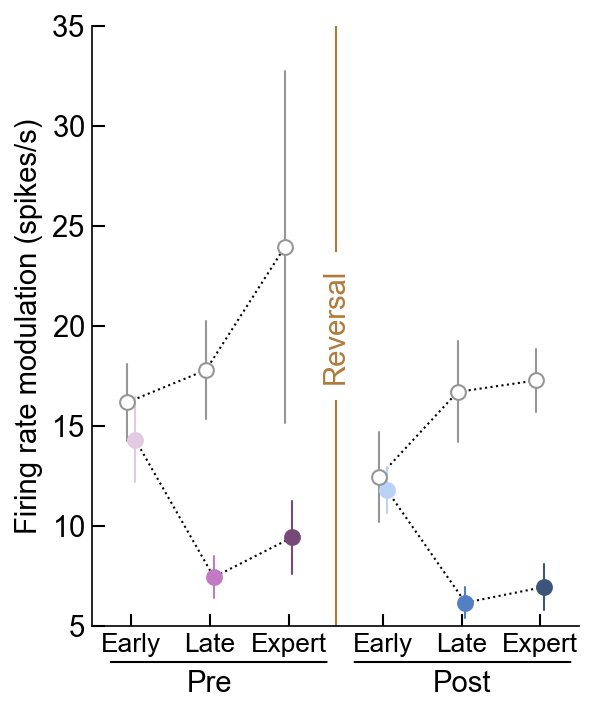

In [72]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1

################################################################################################################

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(passive_data,[-1,-1,-1,1,1,1])):
    border_color=GOOD_GREY
    eye_color='white'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([5,35])
ax.set_yticks([5,10,15,20,25,30,35])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

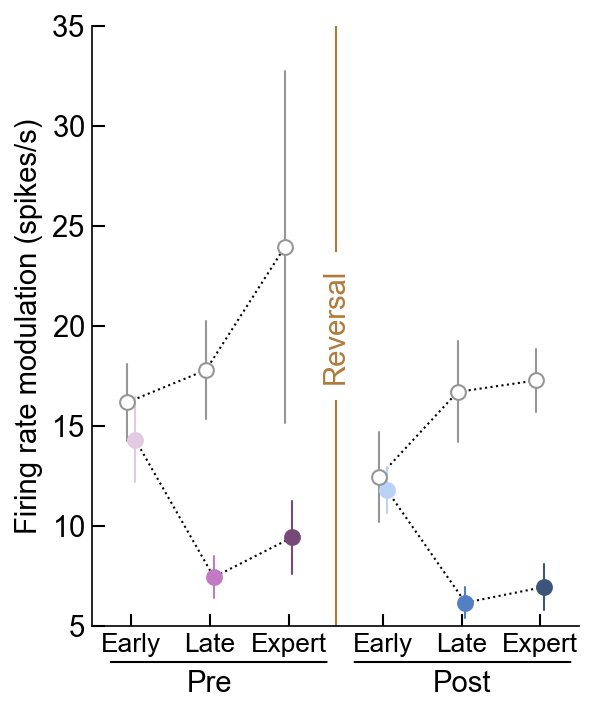

In [75]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1

################################################################################################################

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(passive_data,[-1,-1,-1,1,1,1])):
    border_color=GOOD_GREY
    eye_color='white'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([5,35])
ax.set_yticks([5,10,15,20,25,30,35])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

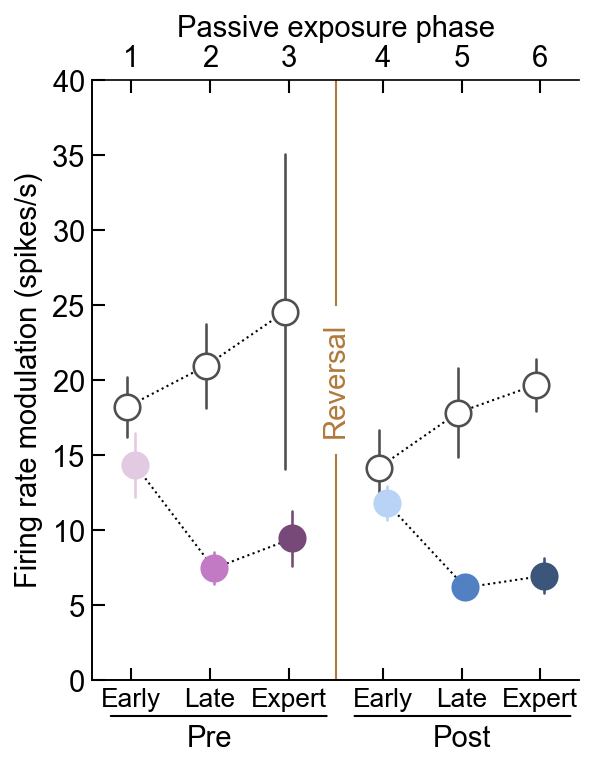

In [21]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1
offset_distance=0.05

################################################################################################################

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(passive_data,[-1,-1,-1,1,1,1])):
    border_color=PASSIVE_COLOR
    eye_color='white'

    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

# ax.set_ylim([0,30])
# ax.set_yticks([0,5,10,15,20,25,30])
ax.set_ylim([0,40])
ax.set_yticks([0,5,10,15,20,25,30,35,40])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

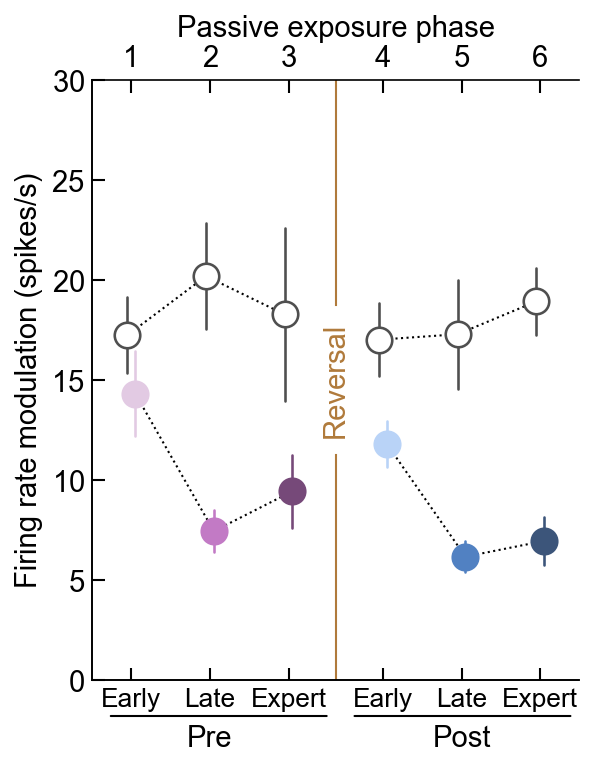

In [52]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1
offset_distance=0.05

################################################################################################################

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(passive_data,[-1,-1,-1,1,1,1])):
    border_color=PASSIVE_COLOR
    eye_color='white'

    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([0,30])
ax.set_yticks([0,5,10,15,20,25,30])
# ax.set_ylim([0,40])
# ax.set_yticks([0,5,10,15,20,25,30,35,40])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

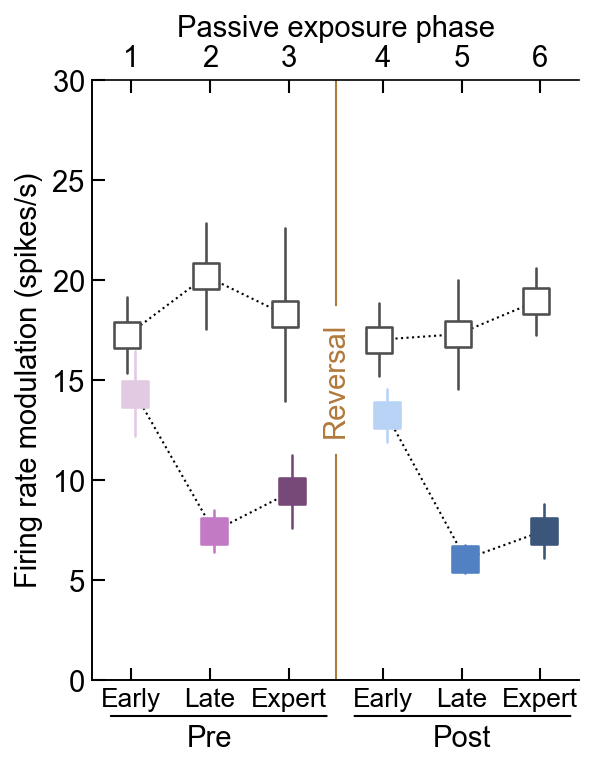

In [31]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1
offset_distance=0.05

################################################################################################################

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(passive_data,[-1,-1,-1,1,1,1])):
    border_color=PASSIVE_COLOR
    eye_color='white'

    summary_size=150
    summary_width=1.25
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ax.set_ylim([0,30])
ax.set_yticks([0,5,10,15,20,25,30])
# ax.set_ylim([0,40])
# ax.set_yticks([0,5,10,15,20,25,30,35,40])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [32]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(FRmod_preearly)
data_dec.prelate = np.abs(FRmod_prelate)
data_dec.preexpert = np.abs(FRmod_preexpert)
data_dec.postearly = np.abs(FRmod_postearly)
data_dec.postlate = np.abs(FRmod_postlate)
data_dec.postexpert = np.abs(FRmod_postexpert)

data_dec2 = SimpleNamespace()
data_dec2.preearly = np.abs(FRmod_passive_preearly)
data_dec2.prelate = np.abs(FRmod_passive_prelate)
data_dec2.preexpert = np.abs(FRmod_passive_preexpert)
data_dec2.postearly = np.abs(FRmod_passive_postearly)
data_dec2.postlate = np.abs(FRmod_passive_postlate)
data_dec2.postexpert = np.abs(FRmod_passive_postexpert)
ilep.nonparametricIndependentStatsCompareToOther(data_dec,data_dec2)
pass

            Source             SS     DF            MS          F  \
0            phase    2121.821193    5.0    424.364239   1.936137   
1          context   14989.693946    1.0  14989.693946  68.389605   
2  phase * context    2568.135555    5.0    513.627111   2.343394   
3         Residual  175344.706455  800.0    219.180883        NaN   

          p-unc       np2  
0  8.608345e-02  0.011956  
1  5.573794e-16  0.078755  
2  3.985273e-02  0.014435  
3           NaN       NaN  

          phase  A  B         p-unc        p-corr    hedges
16   post-early  A  B  5.100548e-02  6.120658e-02 -0.284129
17  post-expert  A  B  1.213506e-10  7.281035e-10 -0.729933
18    post-late  A  B  8.879508e-08  2.663852e-07 -0.949123
19    pre-early  A  B  2.293317e-01  2.293317e-01 -0.225255
20   pre-expert  A  B  2.440829e-03  3.661243e-03 -0.430651
21     pre-late  A  B  1.239554e-06  2.479108e-06 -0.795298
key preearly has 37 and 45 non-nan elements
key prelate has 51 and 60 non-nan elements
key pr

In [33]:
45+60+39+57+48+115

364

In [233]:
### Create dataframe ###
phase = len(FRmod_passive_preearly)*["pre-early"] + len(FRmod_preearly)*["pre-early"] \
    + len(FRmod_passive_prelate)*["pre-late"] + len(FRmod_prelate)*["pre-late"] \
    + len(FRmod_passive_preexpert)*["pre-expert"] + len(FRmod_preexpert)*["pre-expert"] \
    + len(FRmod_passive_postearly)*["post-early"] + len(FRmod_postearly)*["post-early"] \
    + len(FRmod_passive_postlate)*["post-late"] + len(FRmod_postlate)*["post-late"] \
    + len(FRmod_passive_postexpert)*["post-expert"] + len(FRmod_postexpert)*["post-expert"]

context = len(FRmod_passive_preearly)*["passive"] + len(FRmod_preearly)*["active"] \
    + len(FRmod_passive_prelate)*["passive"] + len(FRmod_prelate)*["active"] \
    + len(FRmod_passive_preexpert)*["passive"] + len(FRmod_preexpert)*["active"] \
    + len(FRmod_passive_postearly)*["passive"] + len(FRmod_postearly)*["active"] \
    + len(FRmod_passive_postlate)*["passive"] + len(FRmod_postlate)*["active"] \
    + len(FRmod_passive_postexpert)*["passive"] + len(FRmod_postexpert)*["active"]

mod = (np.concatenate([FRmod_passive_preearly, FRmod_preearly,
    FRmod_passive_prelate, FRmod_prelate,
    FRmod_passive_preexpert, FRmod_preexpert,
    FRmod_passive_postearly, FRmod_postearly,
    FRmod_passive_postlate, FRmod_postlate,
    FRmod_passive_postexpert, FRmod_postexpert]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu

            Source             SS     DF            MS          F  \
0            phase    1911.159667    5.0    382.231933   1.742019   
1          context   17540.567913    1.0  17540.567913  79.940997   
2  phase * context    2698.733006    5.0    539.746601   2.459891   
3         Residual  160395.235947  731.0    219.418927        NaN   

          p-unc       np2  
0  1.226911e-01  0.011775  
1  3.118255e-18  0.098578  
2  3.186801e-02  0.016547  
3           NaN       NaN  



,Contrast,phase,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,phase,-,post-early,post-expert,False,False,13517.0,two-sided,8.621528e-01,8.621528e-01,fdr_bh,-0.111219
1,phase,-,post-early,post-late,False,False,13202.0,two-sided,2.549094e-04,7.647282e-04,fdr_bh,0.220543
2,phase,-,post-early,pre-early,False,False,3986.0,two-sided,5.043883e-03,1.080832e-02,fdr_bh,-0.342872
3,phase,-,post-early,pre-expert,False,False,4834.0,two-sided,1.771469e-01,2.415640e-01,fdr_bh,-0.047706
4,phase,-,post-early,pre-late,False,False,6779.0,two-sided,5.296779e-01,5.675120e-01,fdr_bh,-0.162028
5,phase,-,post-expert,post-late,False,False,19670.0,two-sided,1.676977e-04,7.647282e-04,fdr_bh,0.293160
6,phase,-,post-expert,pre-early,False,False,6113.0,two-sided,4.332701e-03,1.080832e-02,fdr_bh,-0.164417
7,phase,-,post-expert,pre-expert,False,False,7131.0,two-sided,2.673752e-01,3.342190e-01,fdr_bh,0.047418
8,phase,-,post-expert,pre-late,False,False,10215.0,two-sided,4.697152e-01,5.419791e-01,fdr_bh,-0.042330
9,phase,-,post-late,pre-early,False,False,3454.0,two-sided,3.063256e-08,4.594884e-07,fdr_bh,-0.529425


In [46]:
### Create dataframe ###
phase = len(FRmod_passive_preearly)*["pre-early"] + len(FRmod_preearly)*["pre-early"] \
    + len(FRmod_passive_prelate)*["pre-late"] + len(FRmod_prelate)*["pre-late"] \
    + len(FRmod_passive_preexpert)*["pre-expert"] + len(FRmod_preexpert)*["pre-expert"] \
    + len(FRmod_passive_postearly)*["post-early"] + len(FRmod_postearly)*["post-early"] \
    + len(FRmod_passive_postlate)*["post-late"] + len(FRmod_postlate)*["post-late"] \
    + len(FRmod_passive_postexpert)*["post-expert"] + len(FRmod_postexpert)*["post-expert"]

context = len(FRmod_passive_preearly)*["passive"] + len(FRmod_preearly)*["active"] \
    + len(FRmod_passive_prelate)*["passive"] + len(FRmod_prelate)*["active"] \
    + len(FRmod_passive_preexpert)*["passive"] + len(FRmod_preexpert)*["active"] \
    + len(FRmod_passive_postearly)*["passive"] + len(FRmod_postearly)*["active"] \
    + len(FRmod_passive_postlate)*["passive"] + len(FRmod_postlate)*["active"] \
    + len(FRmod_passive_postexpert)*["passive"] + len(FRmod_postexpert)*["active"]

mod = (np.concatenate([FRmod_passive_preearly, FRmod_preearly,
    FRmod_passive_prelate, FRmod_prelate,
    FRmod_passive_preexpert, FRmod_preexpert,
    FRmod_passive_postearly, FRmod_postearly,
    FRmod_passive_postlate, FRmod_postlate,
    FRmod_passive_postexpert, FRmod_postexpert]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu

            Source             SS     DF            MS          F  \
0            phase    1567.127263    5.0    313.425453   1.440229   
1          context   16700.196783    1.0  16700.196783  76.739490   
2  phase * context    2273.710786    5.0    454.742157   2.089597   
3         Residual  176926.638369  813.0    217.621941        NaN   

          p-unc       np2  
0  2.074070e-01  0.008780  
1  1.121661e-17  0.086249  
2  6.464974e-02  0.012688  
3           NaN       NaN  



,Contrast,phase,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,phase,-,post-early,post-expert,False,False,19129.5,two-sided,2.050356e-01,2.795939e-01,fdr_bh,-0.002368
1,phase,-,post-early,post-late,False,False,18112.0,two-sided,3.931051e-06,2.948288e-05,fdr_bh,0.312457
2,phase,-,post-early,pre-early,False,False,5979.0,two-sided,5.830722e-02,1.093260e-01,fdr_bh,-0.184741
3,phase,-,post-early,pre-expert,False,False,8400.0,two-sided,1.697191e-01,2.545786e-01,fdr_bh,0.014082
4,phase,-,post-early,pre-late,False,False,9591.0,two-sided,8.811872e-01,8.811872e-01,fdr_bh,-0.054113
5,phase,-,post-expert,post-late,False,False,20738.0,two-sided,3.498823e-04,1.312059e-03,fdr_bh,0.274288
6,phase,-,post-expert,pre-early,False,False,6748.0,two-sided,5.658098e-03,1.222293e-02,fdr_bh,-0.152014
7,phase,-,post-expert,pre-expert,False,False,9435.0,two-sided,7.923459e-01,8.489420e-01,fdr_bh,0.014681
8,phase,-,post-expert,pre-late,False,False,10870.0,two-sided,3.907039e-01,4.508122e-01,fdr_bh,-0.045784
9,phase,-,post-late,pre-early,False,False,3911.0,two-sided,9.006066e-08,1.350910e-06,fdr_bh,-0.490378


In [226]:
mannwhitneyu(FRmod_passive_prelate,FRmod_passive_preexpert)

MannwhitneyuResult(statistic=512.0, pvalue=0.19744667940446514)

In [269]:
data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
[print(len(d)) for d in data]

41
56
15
19
43
108


[None, None, None, None, None, None]

In [270]:
41+56+15+19+43+108

282

# Percent NCR

In [30]:
pc_NCR_preearly = []
pc_NCR_prelate = []
pc_NCR_preexpert = []
pc_NCR_postearly = []
pc_NCR_postlate = []
pc_NCR_postexpert = []

FR_preearly = []
FR_prelate = []
FR_preexpert = []
FR_postearly = []
FR_postlate = []
FR_postexpert = []

n_preearly = []
n_prelate = []
n_preexpert = []
n_postearly = []
n_postlate = []
n_postexpert = []

print(len(animals))
for animal in animals:
    
    animal_FRmod_preearly = []
    animal_FRmod_prelate = []
    animal_FRmod_preexpert = []
    animal_FRmod_postearly = []
    animal_FRmod_postlate = []
    animal_FRmod_postexpert = []
    
    animal_n_preearly = 0
    animal_n_prelate = 0
    animal_n_preexpert = 0
    animal_n_postearly = 0
    animal_n_postlate = 0
    animal_n_postexpert = 0

    for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
            
        sessionfile = ilep.loadSessionCached(act_directory,session)
        
        acc = stim_acc[idx]
        pval = pval_stim_s[idx]
        if acc < task_encoder_threshold_s or pval > 0.05:
            continue
        if np.isnan(acc) or np.isnan(pval):
            continue
            
        if not is_TE_s[idx]:
            print(f"session {session} cluster {clust} has stim_acc {acc} and pval {pval}!")
        
        if sessionfile.meta.animal != animal:
            continue
        if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
            continue
            
        try:
            FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        except Exception as e:
            print(e)
            FRmod = np.nan
        
        if EILphases[idx] == 'pre early':
            animal_FRmod_preearly.append(FRmod)
            animal_n_preearly += 1
        elif EILphases[idx] == 'pre late':
            animal_FRmod_prelate.append(FRmod)
            animal_n_prelate += 1
        elif EILphases[idx] == 'pre expert':
            animal_FRmod_preexpert.append(FRmod)
            animal_n_preexpert += 1
        elif EILphases[idx] == 'post early':
            animal_FRmod_postearly.append(FRmod)
            animal_n_postearly += 1
        elif EILphases[idx] == 'post late':
            animal_FRmod_postlate.append(FRmod)
            animal_n_postlate += 1
        elif EILphases[idx] == 'post expert':
            animal_FRmod_postexpert.append(FRmod)
            animal_n_postexpert += 1
         
    print(f"{animal}: {len(animal_FRmod_preearly)},{len(animal_FRmod_prelate)},{len(animal_FRmod_preexpert)},{len(animal_FRmod_postearly)},{len(animal_FRmod_postlate)},{len(animal_FRmod_postexpert)}")
        
    FR_preearly.append(animal_FRmod_preearly)
    FR_prelate.append(animal_FRmod_prelate)
    FR_preexpert.append(animal_FRmod_preexpert)
    FR_postearly.append(animal_FRmod_postearly)
    FR_postlate.append(animal_FRmod_postlate)
    FR_postexpert.append(animal_FRmod_postexpert)
        
    pc_NCR_preearly.append(np.mean(np.less(ilep.rmnan(animal_FRmod_preearly),3.5)))
    pc_NCR_prelate.append(np.mean(np.less(ilep.rmnan(animal_FRmod_prelate),3.5)))
    pc_NCR_preexpert.append(np.mean(np.less(ilep.rmnan(animal_FRmod_preexpert),3.5)))
    pc_NCR_postearly.append(np.mean(np.less(ilep.rmnan(animal_FRmod_postearly),3.5)))
    pc_NCR_postlate.append(np.mean(np.less(ilep.rmnan(animal_FRmod_postlate),3.5)))
    pc_NCR_postexpert.append(np.mean(np.less(ilep.rmnan(animal_FRmod_postexpert),3.5)))
    
    n_preearly.append(animal_n_preearly)
    n_prelate.append(animal_n_prelate)
    n_preexpert.append(animal_n_preexpert)
    n_postearly.append(animal_n_postearly)
    n_postlate.append(animal_n_postlate)
    n_postexpert.append(animal_n_postexpert)

13it [00:00, 96.99it/s]

15


1829it [00:30, 59.99it/s] 
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
11it [00:00, 81.46it/s]

BS_40: 0,35,4,3,0,0


1829it [00:32, 56.50it/s] 
13it [00:00, 92.84it/s]

BS_41: 0,0,0,5,41,0


1829it [00:32, 56.57it/s] 
12it [00:00, 119.97it/s]

BS_42: 0,0,0,26,20,7


1829it [00:35, 51.76it/s] 
12it [00:00, 81.06it/s]

BS_49: 22,2,6,0,1,1


1829it [00:36, 50.19it/s] 
12it [00:00, 115.35it/s]

BS_50: 15,0,0,0,0,0


1829it [00:33, 53.92it/s] 
0it [00:00, ?it/s]

BS_51: 0,0,0,0,0,0


1829it [00:33, 54.69it/s] 
12it [00:00, 115.36it/s]

BS_56: 0,0,0,0,0,8


1829it [00:32, 55.54it/s] 
13it [00:00, 99.98it/s]

BS_59: 0,0,0,0,0,0


1829it [00:30, 60.88it/s] 
13it [00:00, 98.46it/s]

BS_67: 0,0,0,0,5,1


1829it [00:30, 60.60it/s] 
12it [00:00, 118.78it/s]

BS_70: 0,14,0,5,23,1


1829it [00:33, 53.85it/s] 
12it [00:00, 108.08it/s]

BS_72: 0,0,13,8,33,0


1829it [00:34, 52.74it/s] 
12it [00:00, 114.26it/s]

BS_87: 0,0,5,37,14,3


1829it [00:30, 60.09it/s] 
11it [00:00, 73.32it/s]

BS_108: 0,0,7,9,0,0


1829it [00:29, 61.46it/s] 
13it [00:00, 100.75it/s]

DS_15: 0,0,9,0,0,46


1829it [00:29, 61.40it/s] 

DS_19: 0,0,6,0,0,13


In [31]:
passive_pc_NCR_preearly = []
passive_pc_NCR_prelate = []
passive_pc_NCR_preexpert = []
passive_pc_NCR_postearly = []
passive_pc_NCR_postlate = []
passive_pc_NCR_postexpert = []

passive_FR_preearly = []
passive_FR_prelate = []
passive_FR_preexpert = []
passive_FR_postearly = []
passive_FR_postlate = []
passive_FR_postexpert = []

passive_n_preearly = []
passive_n_prelate = []
passive_n_preexpert = []
passive_n_postearly = []
passive_n_postlate = []
passive_n_postexpert = []

print(len(['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234','AE_294']))
for animal in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234','AE_294']:
    
    passive_animal_FRmod_preearly = []
    passive_animal_FRmod_prelate = []
    passive_animal_FRmod_preexpert = []
    passive_animal_FRmod_postearly = []
    passive_animal_FRmod_postlate = []
    passive_animal_FRmod_postexpert = []
    
    passive_animal_n_preearly = 0
    passive_animal_n_prelate = 0
    passive_animal_n_preexpert = 0
    passive_animal_n_postearly = 0
    passive_animal_n_postlate = 0
    passive_animal_n_postexpert = 0
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
        
        if session in ['TH_203_1_passive_AC.pickle','TH_203_4_passive_AC.pickle','TH_203_7_passive_AC.pickle','LA_204_2_passive_AC.pickle','LA_204_3_passive_AC.pickle','LA_204_4_passive_AC.pickle']:#Outlier sessions
            continue
#         if session == 'TH_234_3_passive_AC.pickle' and clust in [40,109]:
#             continue
            
        ACsessionfile = ilep.loadSessionCached(act_directory,session)
        
        acc = passive_stim_acc[idx]
        pval = passive_pval_stim_s[idx]
        if acc < task_encoder_threshold_p or pval > 0.05:
            continue
        if np.isnan(acc) or np.isnan(pval):
            continue
        
        if ACsessionfile.meta.animal != animal:
            continue

        #1,2,3,4
        if ACsessionfile.meta.day_of_training <= pre_early:
            passive_animal_FRmod_preearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            passive_animal_n_preearly += 1
        #5,6
        if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
            passive_animal_FRmod_prelate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            passive_animal_n_prelate += 1
        #7,8
        if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
            passive_animal_FRmod_preexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            passive_animal_n_preexpert += 1
        #9,10,11,12
        if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
            passive_animal_FRmod_postearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            passive_animal_n_postearly += 1
        #13,14,15
        if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
            passive_animal_FRmod_postlate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            passive_animal_n_postlate += 1
        #16,17,18,19,20,21
        if ACsessionfile.meta.day_of_training >= post_expert:
            passive_animal_FRmod_postexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            passive_animal_n_postexpert += 1
            
    print(f"{animal}: {len(passive_animal_FRmod_preearly)},{len(passive_animal_FRmod_prelate)},{len(passive_animal_FRmod_preexpert)},{len(passive_animal_FRmod_postearly)},{len(passive_animal_FRmod_postlate)},{len(passive_animal_FRmod_postexpert)}")
    
    passive_FR_preearly.append(passive_animal_FRmod_preearly)
    passive_FR_prelate.append(passive_animal_FRmod_prelate)
    passive_FR_preexpert.append(passive_animal_FRmod_preexpert)
    passive_FR_postearly.append(passive_animal_FRmod_postearly)
    passive_FR_postlate.append(passive_animal_FRmod_postlate)
    passive_FR_postexpert.append(passive_animal_FRmod_postexpert)
    
    passive_pc_NCR_preearly.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_preearly),3.5)))
    passive_pc_NCR_prelate.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_prelate),3.5)))
    passive_pc_NCR_preexpert.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_preexpert),3.5)))
    passive_pc_NCR_postearly.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_postearly),3.5)))
    passive_pc_NCR_postlate.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_postlate),3.5)))
    passive_pc_NCR_postexpert.append(np.mean(np.less(ilep.rmnan(passive_animal_FRmod_postexpert),3.5)))
    
    passive_n_preearly.append(passive_animal_n_preearly)
    passive_n_prelate.append(passive_animal_n_prelate)
    passive_n_preexpert.append(passive_animal_n_preexpert)
    passive_n_postearly.append(passive_animal_n_postearly)
    passive_n_postlate.append(passive_animal_n_postlate)
    passive_n_postexpert.append(passive_animal_n_postexpert)

5it [00:00, 41.66it/s]

10


1540it [00:15, 99.03it/s] 
4it [00:00, 33.33it/s]

TH_201: 42,8,0,0,0,0


1540it [00:15, 99.11it/s] 
4it [00:00, 39.59it/s]

TH_203: 3,6,0,0,0,0


1540it [00:13, 112.27it/s]
5it [00:00, 41.31it/s]

LA_204: 0,0,0,5,3,0


1540it [00:13, 110.86it/s]
5it [00:00, 40.31it/s]

LA_205: 0,0,0,15,0,0


1540it [00:14, 108.63it/s]
4it [00:00, 39.99it/s]

TH_200: 0,0,0,0,13,2


1540it [00:14, 107.45it/s]
4it [00:00, 39.99it/s]

TH_230: 0,0,0,0,22,42


1540it [00:14, 105.07it/s]
5it [00:00, 40.64it/s]

AE_229: 0,0,0,0,10,71


1540it [00:14, 102.86it/s]
5it [00:00, 39.99it/s]

TH_233: 0,20,5,0,0,0


1540it [00:14, 104.24it/s]
5it [00:00, 39.99it/s]

TH_234: 0,26,12,0,0,0


1540it [00:14, 104.31it/s]

AE_294: 0,0,22,37,0,0


In [32]:
# mean_pc_NCR = np.array([np.mean(ilep.rmnan(d)) for d in [pc_NCR_preearly,pc_NCR_prelate,pc_NCR_preexpert,pc_NCR_postearly,pc_NCR_postlate,pc_NCR_postexpert]])*100
# mean_pc_NCR = np.array([np.nansum(np.array(d1)*np.array(d2))/np.nansum(d2) for d1,d2 in zip([pc_NCR_preearly,pc_NCR_prelate,pc_NCR_preexpert,pc_NCR_postearly,pc_NCR_postlate,pc_NCR_postexpert],[n_preearly,n_prelate,n_preexpert,n_postearly,n_postlate,n_postexpert])])*100
# sem_pc_NCR = np.array([sem(ilep.rmnan(d)) for d in [pc_NCR_preearly,pc_NCR_prelate,pc_NCR_preexpert,pc_NCR_postearly,pc_NCR_postlate,pc_NCR_postexpert]])*100

mean_pc_NCR = []
sem_pc_NCR = []
for FRmods in [FR_preearly,FR_prelate,FR_preexpert,FR_postearly,FR_postlate,FR_postexpert]:
    Mw,SEMw = ilep.bootstrap_Mw_SEMw(FRmods,n_frac=1,CR_NCR_thresh=3.5)
    mean_pc_NCR.append(Mw)
    sem_pc_NCR.append(SEMw)

../..\InsanallyLabEphysTools\analysis.py:832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  FRmods = np.array(FRmods)


In [33]:
# passive_mean_pc_NCR = np.array([np.mean(ilep.rmnan(d)) for d in [passive_pc_NCR_preearly,passive_pc_NCR_prelate,passive_pc_NCR_preexpert,passive_pc_NCR_postearly,passive_pc_NCR_postlate,passive_pc_NCR_postexpert]])*100
# passive_mean_pc_NCR = np.array([np.nansum(np.array(d1)*np.array(d2))/np.nansum(d2) for d1,d2 in zip([passive_pc_NCR_preearly,passive_pc_NCR_prelate,passive_pc_NCR_preexpert,passive_pc_NCR_postearly,passive_pc_NCR_postlate,passive_pc_NCR_postexpert],[passive_n_preearly,passive_n_prelate,passive_n_preexpert,passive_n_postearly,passive_n_postlate,passive_n_postexpert])])*100
# passive_sem_pc_NCR = np.array([sem(ilep.rmnan(d)) for d in [passive_pc_NCR_preearly,passive_pc_NCR_prelate,passive_pc_NCR_preexpert,passive_pc_NCR_postearly,passive_pc_NCR_postlate,passive_pc_NCR_postexpert]])*100

passive_mean_pc_NCR = []
passive_sem_pc_NCR = []
for FRmods in [passive_FR_preearly,passive_FR_prelate,passive_FR_preexpert,passive_FR_postearly,passive_FR_postlate,passive_FR_postexpert]:
    Mw,SEMw = ilep.bootstrap_Mw_SEMw(FRmods,n_frac=1,CR_NCR_thresh=3.5)
    passive_mean_pc_NCR.append(Mw)
    passive_sem_pc_NCR.append(SEMw)

In [34]:
print('loaded')

loaded


In [35]:
5

5

In [ ]:
Xs = [FR_preearly,FR_prelate,FR_preexpert,FR_postearly,FR_postlate,FR_postexpert]
Ys = [passive_FR_preearly,passive_FR_prelate,passive_FR_preexpert,passive_FR_postearly,passive_FR_postlate,passive_FR_postexpert]
for X,Y in zip(Xs,Ys):
    pval = ilep.bootstrap_pc_NCR_test(X,Y,B=100000,CR_NCR_thresh=[3.5])
    print(pval)

In [29]:
[print(np.sum(np.isfinite(l))) for l in [passive_FR_preearly,passive_FR_prelate,passive_FR_preexpert,passive_FR_postearly,passive_FR_postlate,passive_FR_postexpert]]

0
0
0
0
0
0


[None, None, None, None, None, None]

In [149]:
TEs = 0
for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILphases[idx] not in ['pre early','pre late','pre expert','post early','post late','post expert']:
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
        
        
        
    acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    acc2 = stim_acc[idx]
    if acc != acc2 and np.isfinite(acc) and np.isfinite(acc2):
        print(f"session {session} cluster {clust} has accs {acc} and {acc2}")
    pval = pval_stim_s[idx]

    is_TE_here = is_TE_s[idx]
    is_TE_there = acc2>=task_encoder_threshold_s and pval<0.05
    if is_TE_here != is_TE_there:
        print(f"session {session} cluster {clust} has evaluations {is_TE_here} and {is_TE_there}")
        
    if is_TE_here:
        TEs += 1

1830it [00:31, 58.44it/s] 


In [150]:
TEs

461

## Weighted

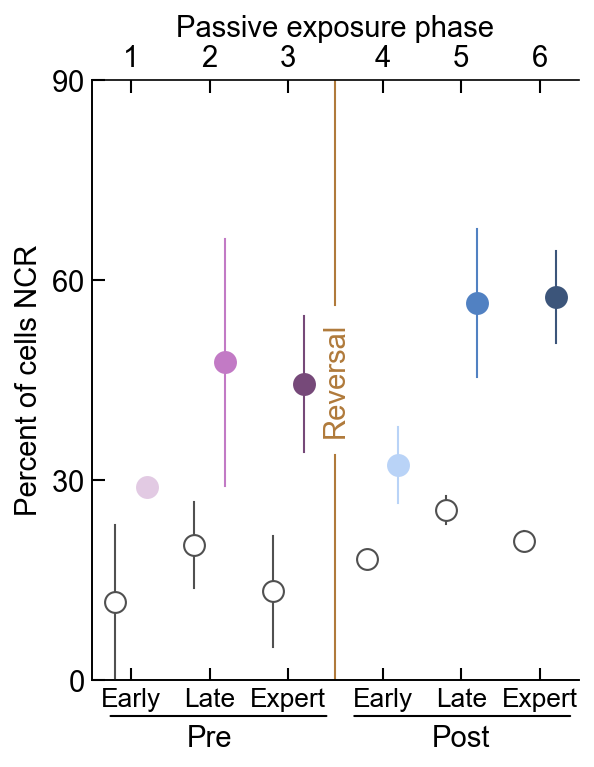

In [145]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1

################################################################################################################

wid = 0.2
summary_size=50
summary_width=1

for idx,p in zip(range(6),[-1,-1,-1,1,1,1]):
    ax.scatter([idx-wid+p*switch_offset],(passive_mean_pc_NCR[idx]),fc='white',ec=PASSIVE_COLOR,s=100,zorder=10,marker='o',lw=1)
    ax.plot([idx-wid+p*switch_offset,idx-wid+p*switch_offset],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=PASSIVE_COLOR,lw=1,zorder=9)
    
    ax.scatter([idx+wid+p*switch_offset],(mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=100,zorder=10,marker='o',lw=1)
    ax.plot([idx+wid+p*switch_offset,idx+wid+p*switch_offset],[(mean_pc_NCR[idx]-sem_pc_NCR[idx]),(mean_pc_NCR[idx]+sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=1,zorder=9)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=PASSIVE_COLOR,s=50,zorder=9,marker='o',lw=1)
# statsbar(ax,60,[1-wid-switch_offset,1+wid-switch_offset],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='**',lw=1)
# statsbar(ax,76,[4-wid+switch_offset,4+wid+switch_offset],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=1)
# statsbar(ax,60,[5-wid+switch_offset,5+wid+switch_offset],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,90])
ax.set_yticks([0,30,60,90])
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

ax.scatter([], [], ec=PASSIVE_COLOR,fc='white', s=summary_size,lw=summary_width,marker='o',label='passive')
ax.scatter([], [], ec=PASSIVE_COLOR,fc=PASSIVE_COLOR, s=summary_size,lw=summary_width,marker='o',label='behaving')
# ax.legend(frameon=False,loc=(0.5,0.1),fontsize=14)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent NCR task encoders V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

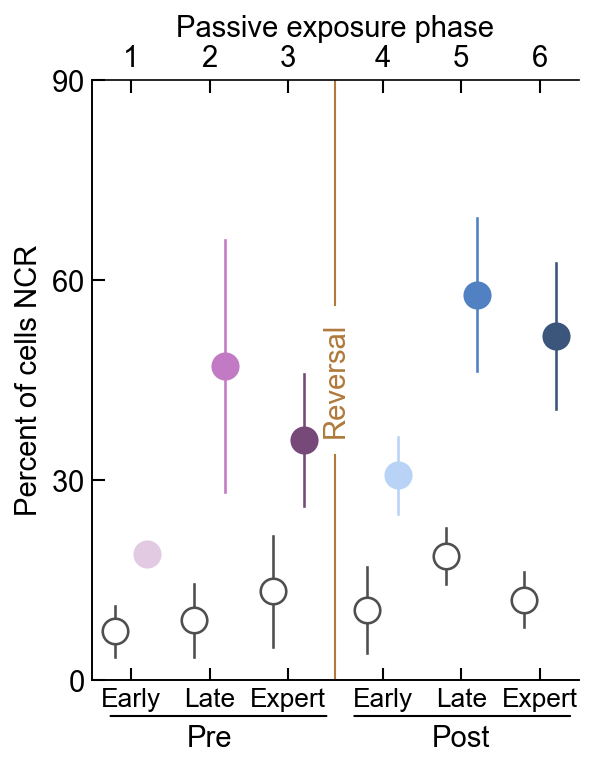

In [243]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1

################################################################################################################

wid = 0.2
summary_size=150
summary_width=1.25

for idx,p in zip(range(6),[-1,-1,-1,1,1,1]):
    ax.scatter([idx-wid+p*switch_offset],(passive_mean_pc_NCR[idx]),fc='white',ec=PASSIVE_COLOR,s=summary_size,zorder=10,marker='o',lw=summary_width)
    ax.plot([idx-wid+p*switch_offset,idx-wid+p*switch_offset],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=PASSIVE_COLOR,lw=summary_width,zorder=9)
    
    ax.scatter([idx+wid+p*switch_offset],(mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=summary_size,zorder=10,marker='o',lw=summary_width)
    ax.plot([idx+wid+p*switch_offset,idx+wid+p*switch_offset],[(mean_pc_NCR[idx]-sem_pc_NCR[idx]),(mean_pc_NCR[idx]+sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=summary_width,zorder=9)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=PASSIVE_COLOR,s=50,zorder=9,marker='o',lw=1)
# statsbar(ax,60,[1-wid-switch_offset,1+wid-switch_offset],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='**',lw=1)
# statsbar(ax,76,[4-wid+switch_offset,4+wid+switch_offset],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=1)
# statsbar(ax,60,[5-wid+switch_offset,5+wid+switch_offset],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,90])
ax.set_yticks([0,30,60,90])
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

ax.scatter([], [], ec=PASSIVE_COLOR,fc='white', s=summary_size,lw=summary_width,marker='o',label='passive')
ax.scatter([], [], ec=PASSIVE_COLOR,fc=PASSIVE_COLOR, s=summary_size,lw=summary_width,marker='o',label='behaving')
# ax.legend(frameon=False,loc=(0.5,0.1),fontsize=14)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent NCR task encoders V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

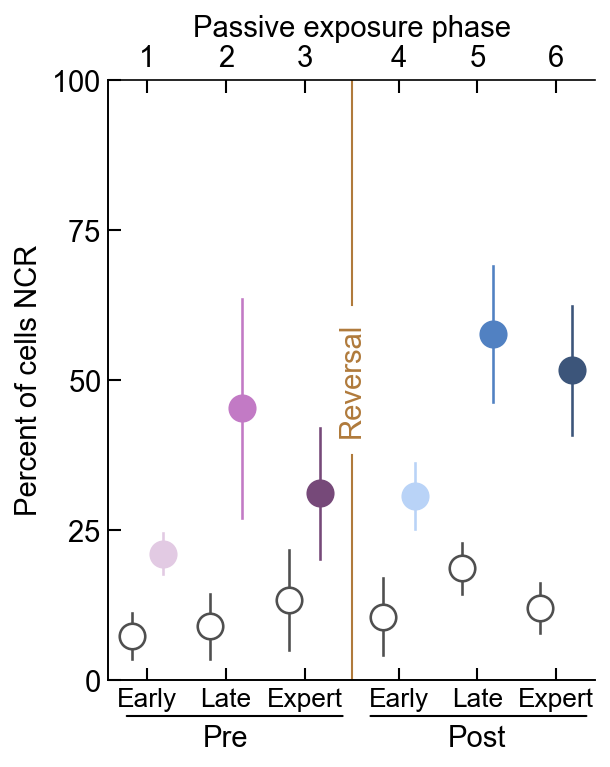

In [29]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.1

################################################################################################################

wid = 0.2
summary_size=150
summary_width=1.25

for idx,p in zip(range(6),[-1,-1,-1,1,1,1]):
    ax.scatter([idx-wid+p*switch_offset],(passive_mean_pc_NCR[idx]),fc='white',ec=PASSIVE_COLOR,s=summary_size,zorder=10,marker='o',lw=summary_width)
    ax.plot([idx-wid+p*switch_offset,idx-wid+p*switch_offset],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=PASSIVE_COLOR,lw=summary_width,zorder=9)
    
    ax.scatter([idx+wid+p*switch_offset],(mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=summary_size,zorder=10,marker='o',lw=summary_width)
    ax.plot([idx+wid+p*switch_offset,idx+wid+p*switch_offset],[(mean_pc_NCR[idx]-sem_pc_NCR[idx]),(mean_pc_NCR[idx]+sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=summary_width,zorder=9)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=PASSIVE_COLOR,s=50,zorder=9,marker='o',lw=1)
# statsbar(ax,60,[1-wid-switch_offset,1+wid-switch_offset],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='**',lw=1)
# statsbar(ax,76,[4-wid+switch_offset,4+wid+switch_offset],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=1)
# statsbar(ax,60,[5-wid+switch_offset,5+wid+switch_offset],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,100])
ax.set_yticks([0,25,50,75,100])
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

ax.scatter([], [], ec=PASSIVE_COLOR,fc='white', s=summary_size,lw=summary_width,marker='o',label='passive')
ax.scatter([], [], ec=PASSIVE_COLOR,fc=PASSIVE_COLOR, s=summary_size,lw=summary_width,marker='o',label='behaving')
# ax.legend(frameon=False,loc=(0.5,0.1),fontsize=14)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent NCR task encoders V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

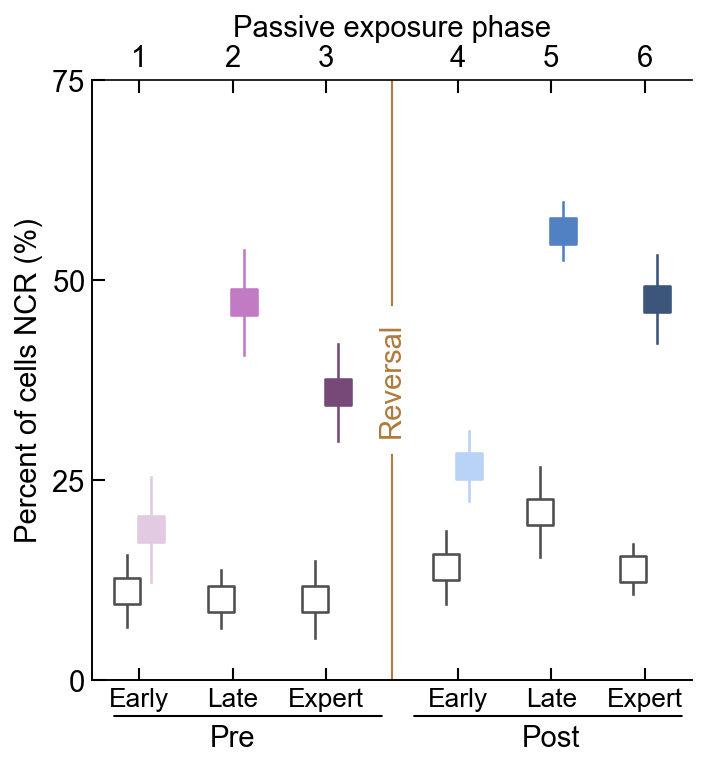

In [34]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.2

################################################################################################################

wid = 0.125#0.175
summary_size=150
summary_width=1.25

for idx,p in zip(range(6),[-1,-1,-1,1,1,1]):
    ax.scatter([idx-wid+p*switch_offset],(passive_mean_pc_NCR[idx]),fc='white',ec=PASSIVE_COLOR,s=summary_size,zorder=10,marker='s',lw=summary_width)
    ax.plot([idx-wid+p*switch_offset,idx-wid+p*switch_offset],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=PASSIVE_COLOR,lw=summary_width,zorder=9)
    
    ax.scatter([idx+wid+p*switch_offset],(mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=summary_size,zorder=10,marker='s',lw=summary_width)
    ax.plot([idx+wid+p*switch_offset,idx+wid+p*switch_offset],[(mean_pc_NCR[idx]-sem_pc_NCR[idx]),(mean_pc_NCR[idx]+sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=summary_width,zorder=9)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=PASSIVE_COLOR,s=50,zorder=9,marker='o',lw=1)
# statsbar(ax,60,[1-wid-switch_offset,1+wid-switch_offset],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='**',lw=1)
# statsbar(ax,76,[4-wid+switch_offset,4+wid+switch_offset],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=1)
# statsbar(ax,60,[5-wid+switch_offset,5+wid+switch_offset],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Percent of cells NCR (%)')
ax.set_ylim([0,75])
ax.set_yticks([0,25,50,75])
              
ax.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

ax2 = ax.twiny()
ax2.spines['top'].set_visible(True)
ax2.get_xaxis().set_visible(True)
ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax2.set_xticklabels(labels2)
xlab2 = ax2.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
    ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(stdfont)

ax.scatter([], [], ec=PASSIVE_COLOR,fc='white', s=summary_size,lw=summary_width,marker='o',label='passive')
ax.scatter([], [], ec=PASSIVE_COLOR,fc=PASSIVE_COLOR, s=summary_size,lw=summary_width,marker='o',label='behaving')
# ax.legend(frameon=False,loc=(0.5,0.1),fontsize=14)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2,xlab2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent NCR task encoders V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## Stats

In [34]:
Xs = [FR_preearly,FR_prelate,FR_preexpert,FR_postearly,FR_postlate,FR_postexpert]
Ys = [passive_FR_preearly,passive_FR_prelate,passive_FR_preexpert,passive_FR_postearly,passive_FR_postlate,passive_FR_postexpert]

pvals = [np.nan]*6
for idx,(X,Y) in enumerate(zip(Xs,Ys)):
    pvals[idx] = ilep.bootstrap_pc_NCR_test(X,Y,B=250000,CR_NCR_thresh=[3.5])
    print(pvals[idx])
    
_,pvals_corr = pg.multicomp(pvals,method='fdr_bh')
print()
print(pvals_corr)

0.31508
0.0
0.0012000000000000899
0.0420640000000001
0.0
0.0

[0.31508   0.        0.0018    0.0504768 0.        0.       ]


In [38]:
5

5

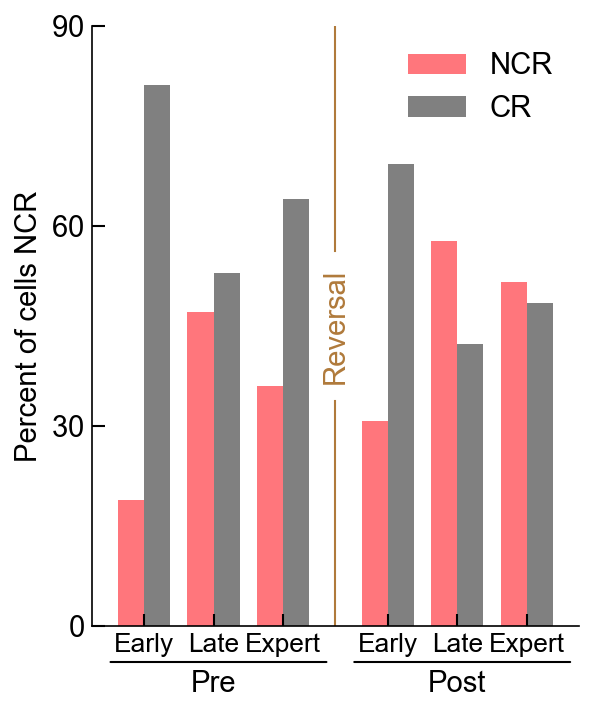

In [263]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

wid = 0.75/2
summary_size=150
summary_width=1.25

for idx,p in zip(range(6),[-1,-1,-1,1,1,1]):
    
    ax.bar([idx-wid*0.5+p*switch_offset],[mean_pc_NCR[idx]],color=NCR_COLOR,width=wid)
    ax.bar([idx+wid*0.5+p*switch_offset],[100-mean_pc_NCR[idx]],color=CR_COLOR,width=wid)
    
#     ax.scatter([idx-wid+p*switch_offset],(passive_mean_pc_NCR[idx]),fc='white',ec=PASSIVE_COLOR,s=summary_size,zorder=10,marker='o',lw=summary_width)
#     ax.plot([idx-wid+p*switch_offset,idx-wid+p*switch_offset],[(passive_mean_pc_NCR[idx]-passive_sem_pc_NCR[idx]),(passive_mean_pc_NCR[idx]+passive_sem_pc_NCR[idx])],color=PASSIVE_COLOR,lw=summary_width,zorder=9)
    
#     ax.scatter([idx+wid+p*switch_offset],(mean_pc_NCR[idx]),c=PHASE_COLORS[idx],s=summary_size,zorder=10,marker='o',lw=summary_width)
#     ax.plot([idx+wid+p*switch_offset,idx+wid+p*switch_offset],[(mean_pc_NCR[idx]-sem_pc_NCR[idx]),(mean_pc_NCR[idx]+sem_pc_NCR[idx])],color=PHASE_COLORS[idx],lw=summary_width,zorder=9)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=PASSIVE_COLOR,s=50,zorder=9,marker='o',lw=1)
# statsbar(ax,60,[1-wid-switch_offset,1+wid-switch_offset],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='**',lw=1)
# statsbar(ax,76,[4-wid+switch_offset,4+wid+switch_offset],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=1)
# statsbar(ax,60,[5-wid+switch_offset,5+wid+switch_offset],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=1)

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']
labels2 = [1,2,3,4,5,6]

ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,90])
ax.set_yticks([0,30,60,90])
              
ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

# ax.scatter([], [], ec=PASSIVE_COLOR,fc='white', s=summary_size,lw=summary_width,marker='o',label='passive')
# ax.scatter([], [], ec=PASSIVE_COLOR,fc=PASSIVE_COLOR, s=summary_size,lw=summary_width,marker='o',label='behaving')

ax.bar([np.nan],[np.nan],color=NCR_COLOR,label='NCR')
ax.bar([np.nan],[np.nan],color=CR_COLOR,label='CR')
ax.legend(frameon=False,loc='upper right',fontsize=14)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC percent CR and NCR task encoders V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')